In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("data\Obesity Classification.csv")

In [3]:
data

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normalweight
1,2,30,Female,160,60,22.5,Normalweight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [4]:
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normalweight
1,2,30,Female,160,60,22.5,Normalweight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [5]:
data.tail()

,ID,Age,Gender,Height,Weight,BMI,Label
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight
107,110,31,Male,190,20,8.3,Underweight


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [7]:
data.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [8]:
 data.shape

(108, 7)

In [9]:
data.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [10]:
data.nunique()

ID        108
Age        75
Gender      2
Height     10
Weight     23
BMI        25
Label       4
dtype: int64

In [11]:
data['Label'].unique

<bound method Series.unique of 0      Normalweight
1      Normalweight
2        Overweight
3       Underweight
4             Obese
           ...     
103     Underweight
104     Underweight
105     Underweight
106     Underweight
107     Underweight
Name: Label, Length: 108, dtype: object>

In [12]:
data.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [13]:
customer=data.drop(['Gender'], axis=1)

In [14]:
customer.head()

,ID,Age,Height,Weight,BMI,Label
0,1,25,175,80,25.3,Normalweight
1,2,30,160,60,22.5,Normalweight
2,3,35,180,90,27.3,Overweight
3,4,40,150,50,20.0,Underweight
4,5,45,190,100,31.2,Obese


In [15]:
print(data['Label'].unique())


['Normalweight' 'Overweight' 'Underweight' 'Obese']


In [16]:
customer['Label'] = customer['Label'].replace({'Normalweight': 1, 'Overweight': 2, 'Obese': 3, 'Underweight': 0})




C:\Users\iroja\AppData\Local\Temp\ipykernel_7156\3304073141.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer['Label'] = customer['Label'].replace({'Normalweight': 1, 'Overweight': 2, 'Obese': 3, 'Underweight': 0})


In [17]:
customer.corr()

,ID,Age,Height,Weight,BMI,Label
ID,1.000000,-0.298257,-0.008224,-0.572625,-0.615235,-0.459655
Age,-0.298257,1.000000,-0.076896,0.465106,0.474185,0.451868
Height,-0.008224,-0.076896,1.000000,0.428890,0.354340,0.428596
Weight,-0.572625,0.465106,0.428890,1.000000,0.972829,0.935518
BMI,-0.615235,0.474185,0.354340,0.972829,1.000000,0.871449
Label,-0.459655,0.451868,0.428596,0.935518,0.871449,1.000000


<Axes: >

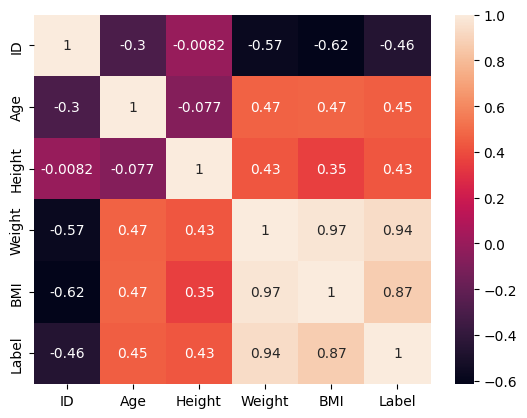

In [18]:

corelation=customer.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

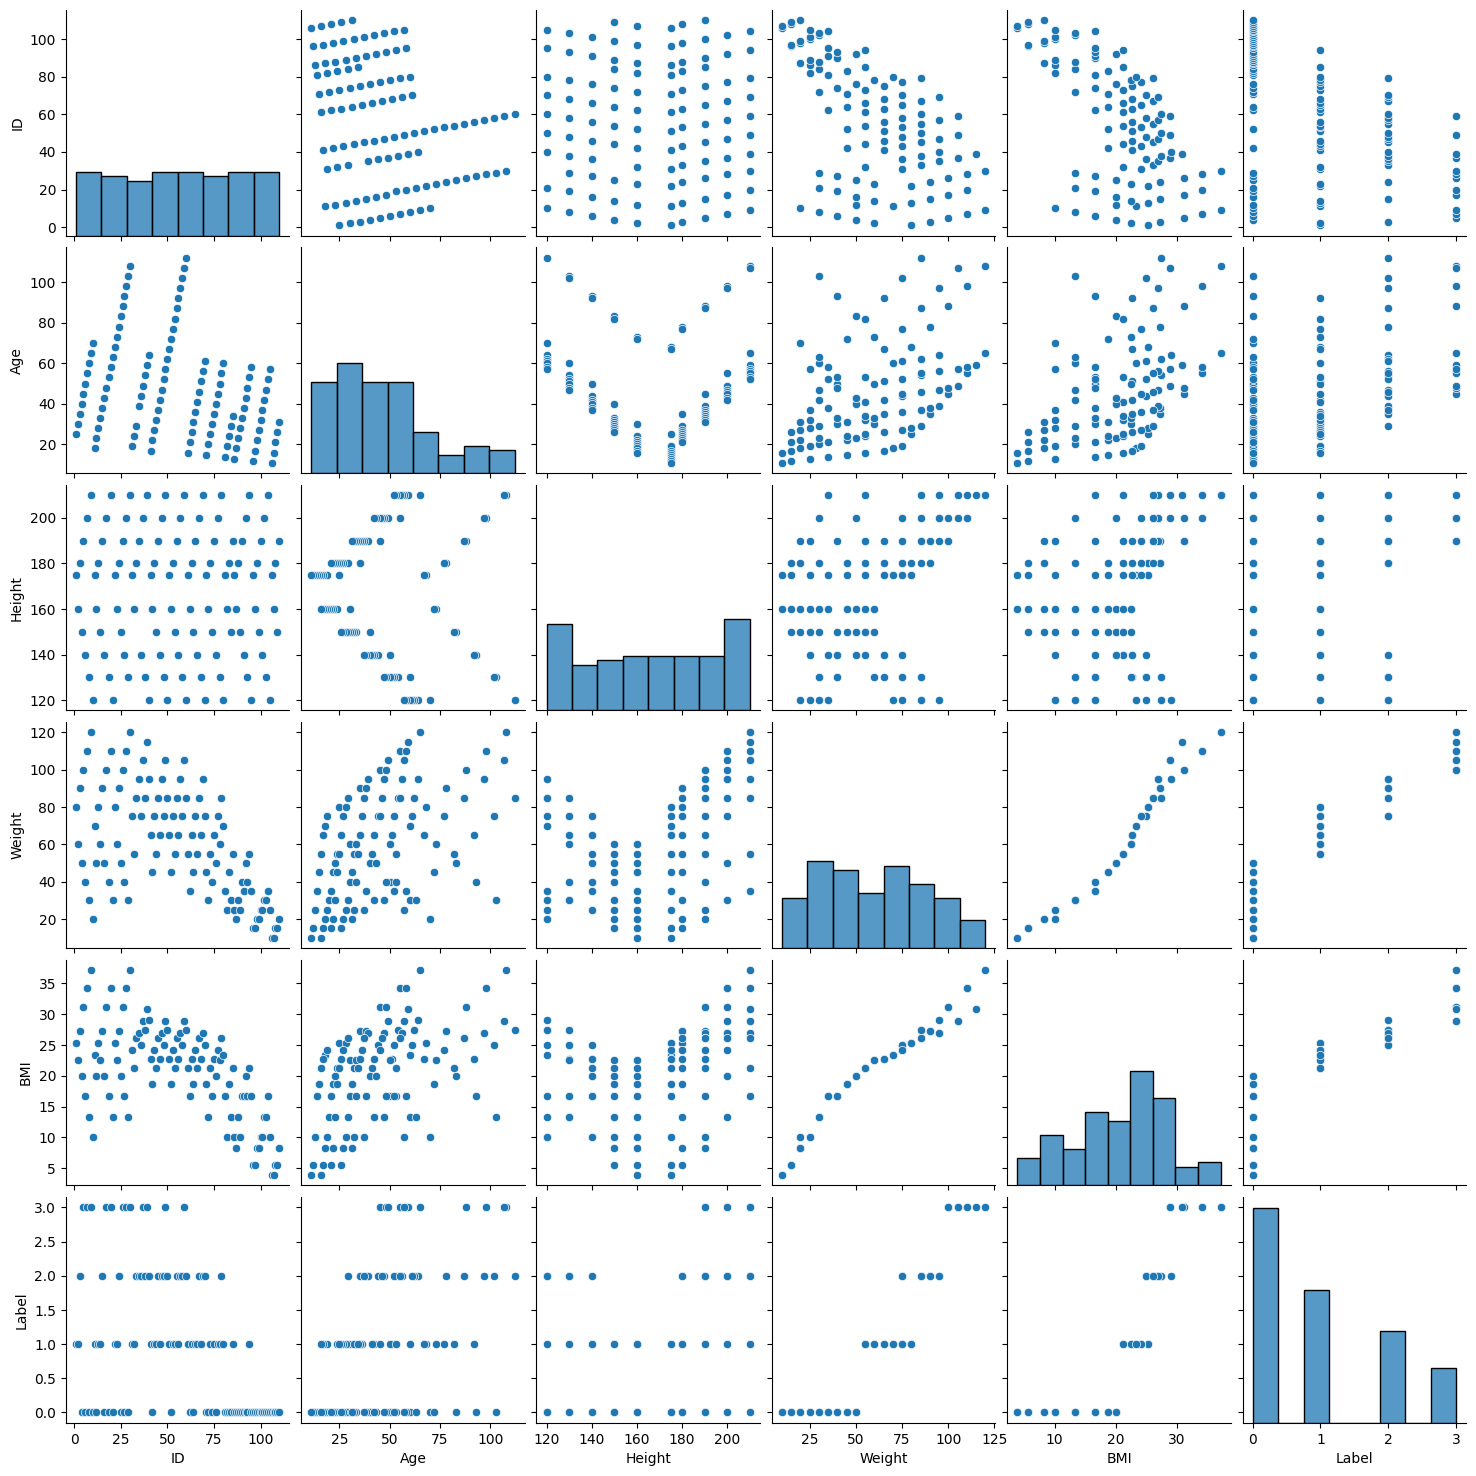

In [19]:
sns.pairplot(customer)

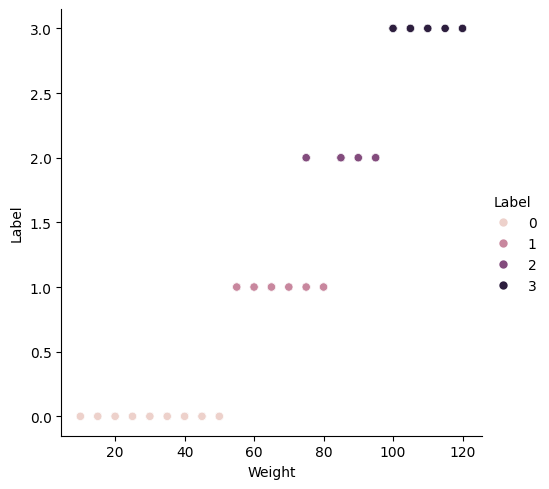

In [20]:
sns.relplot(x='Weight',y='Label',hue='Label',data=customer)

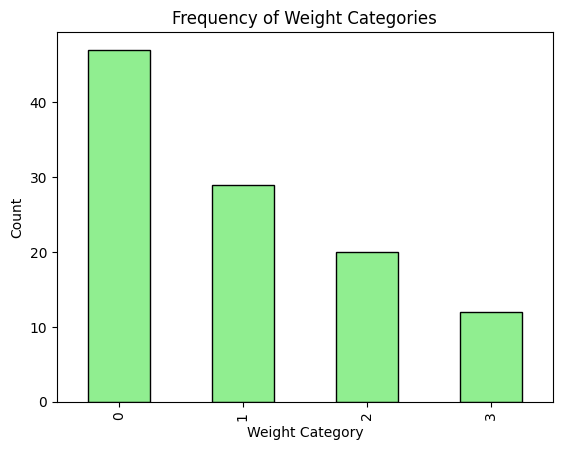

In [21]:
import matplotlib.pyplot as plt
category_counts = customer['Label'].value_counts()

# Plot bar plot
category_counts.plot(kind='bar', color='lightgreen', edgecolor='black')




# Add labels and title
plt.title('Frequency of Weight Categories')
plt.xlabel('Weight Category')
plt.ylabel('Count')

# Show the plot
plt.show()

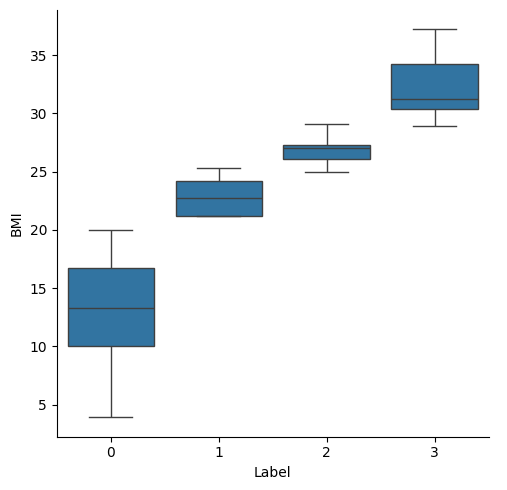

In [22]:
sns.catplot(x='Label',y='BMI',kind='box',data=customer)

In [23]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('data\Obesity Classification.csv')

# Drop ID column (since it's just an identifier)
data = data.drop(columns=['ID'])

# Function to calculate BMI
def calculate_bmi(weight, height):
    bmi = weight / (height / 100) ** 2  # BMI formula (weight in kg, height in cm)
    return bmi

# Function to find the closest label based on BMI
def find_label_by_bmi(weight, height):
    # Calculate BMI based on input weight and height
    input_bmi = calculate_bmi(weight, height)
    print(f"Calculated BMI: {input_bmi:.2f}")
    
    # Find the row with the closest BMI in the dataset
    closest_index = (data['BMI'] - input_bmi).abs().idxmin()
    
    # Get the label corresponding to the closest BMI
    closest_label = data.loc[closest_index, 'Label']
    
    # Return the label
    return closest_label

# Example: Predict label based on input weight and height
input_weight =  60 # Example weight in kilograms
input_height = 140.21 # Example height in centimeters

predicted_label = find_label_by_bmi(input_weight, input_height)
print(f"The predicted obesity label for weight {input_weight} kg and height {input_height} cm is: {predicted_label}")


Calculated BMI: 30.52
The predicted obesity label for weight 60 kg and height 140.21 cm is: Obese


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [25]:
X = data[[ 'Age', 'Height','Weight','BMI']]
y = data['Label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
# Create a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

Normalweight       1.00      1.00      1.00         6
       Obese       1.00      1.00      1.00         4
  Overweight       1.00      1.00      1.00         4
 Underweight       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [28]:
# Create a LogisticRegression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)




LogisticRegression(random_state=42)

In [29]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.95
              precision    recall  f1-score   support

Normalweight       1.00      1.00      1.00         6
       Obese       1.00      0.75      0.86         4
  Overweight       0.80      1.00      0.89         4
 Underweight       1.00      1.00      1.00         8

    accuracy                           0.95        22
   macro avg       0.95      0.94      0.94        22
weighted avg       0.96      0.95      0.95        22



In [30]:
# Create a KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)  # You can choose different values for n_neighbors

# Train the model
model.fit(X_train, y_train)


KNeighborsClassifier()

In [31]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.82
              precision    recall  f1-score   support

Normalweight       0.71      0.83      0.77         6
       Obese       1.00      0.75      0.86         4
  Overweight       0.60      0.75      0.67         4
 Underweight       1.00      0.88      0.93         8

    accuracy                           0.82        22
   macro avg       0.83      0.80      0.81        22
weighted avg       0.85      0.82      0.83        22



In [32]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

model = GaussianNB()


In [33]:
model.fit(X_train, y_train)

GaussianNB()

In [34]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))



Accuracy: 0.86
              precision    recall  f1-score   support

Normalweight       0.80      0.67      0.73         6
       Obese       1.00      1.00      1.00         4
  Overweight       0.60      0.75      0.67         4
 Underweight       1.00      1.00      1.00         8

    accuracy                           0.86        22
   macro avg       0.85      0.85      0.85        22
weighted avg       0.87      0.86      0.87        22



In [35]:
from sklearn.svm import SVC
# Create a Support Vector Classifier model
model = SVC(kernel='linear', C=1.0, random_state=42)  # You can use different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [36]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

Normalweight       1.00      1.00      1.00         6
       Obese       1.00      1.00      1.00         4
  Overweight       1.00      1.00      1.00         4
 Underweight       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

Normalweight       1.00      1.00      1.00         6
       Obese       1.00      1.00      1.00         4
  Overweight       1.00      1.00      1.00         4
 Underweight       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

